In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [38]:
movies = pd.read_csv('ml-small/movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [39]:
ratings = pd.read_csv('ml-small/ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [40]:
genres = []
for _ in movies['genres']:
    for genre in _.split('|'):
        if genre not in genres:
            genres.append(genre)
genres = genres[:-1]
genres

['Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Fantasy',
 'Romance',
 'Drama',
 'Action',
 'Crime',
 'Thriller',
 'Horror',
 'Mystery',
 'Sci-Fi',
 'War',
 'Musical',
 'Documentary',
 'IMAX',
 'Western',
 'Film-Noir']

In [41]:
# user_rating = pd.DataFrame()
# for genre in genres:
#     genre_movies = movies[movies['genres'].str.contains(genre)]
#     avg_genre_votes = ratings[ratings['movieId'].isin(genre_movies['movieId'])].loc[:,['userId','rating']].groupby(['userId'])['rating'].mean().round(2)
#     genre_rating = pd.concat([genre_rating,avg_genre_votes], axis=1)
# genre_rating.columns = genres    
# genre_rating.index.name = 'userId'
# genre_rating.head()

In [42]:
genre_rating = pd.DataFrame()
for genre in genres:
    genre_movies = movies[movies['genres'].str.contains(genre)]
    avg_genre_votes = ratings[ratings['movieId'].isin(genre_movies['movieId'])].loc[:,['userId','rating']].groupby(['userId'])['rating'].mean().round(2)
    genre_rating = pd.concat([genre_rating,avg_genre_votes], axis=1)
genre_rating.columns = genres    
genre_rating.index.name = 'userId'
genre_rating.head()
    

,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir
userId,,,,,,,,,,,,,,,,,,,
1,4.39,4.69,4.55,4.28,4.30,4.31,4.53,4.32,4.36,4.15,3.47,4.17,4.22,4.50,4.68,NaN,NaN,4.29,5.0
2,4.17,NaN,NaN,4.00,NaN,4.50,3.88,3.95,3.80,3.70,3.00,4.00,3.88,4.50,NaN,4.33,3.75,3.50,NaN
3,2.73,0.50,0.50,1.00,3.38,0.50,0.75,3.57,0.50,4.14,4.69,5.00,4.20,0.50,0.50,NaN,NaN,NaN,NaN
4,3.66,4.00,3.80,3.51,3.68,3.38,3.48,3.32,3.81,3.55,4.25,3.48,2.83,3.57,4.00,4.00,3.00,3.80,4.0
5,3.25,4.33,4.11,3.47,4.14,3.09,3.80,3.11,3.83,3.56,3.00,4.00,2.50,3.33,4.40,NaN,3.67,3.00,NaN


In [43]:
def bias_genre_set(genre_rating,genres,l,h):
    biased_data = pd.DataFrame()
    for genre in genres:
        biased_genre = genre_rating[(genre_rating[genre]>l) & (genre_rating[genre]<h)].loc[:,[genre]]
        biased_data = pd.concat([biased_data, biased_genre], axis=1)
    return biased_data

In [44]:
biased_rating = bias_genre_set(genre_rating, ['Romance', 'Sci-Fi'], 1.0, 5.0)[:300]
biased_rating.dropna(inplace=True)
biased_rating.head()

,Romance,Sci-Fi
userId,,
1,4.31,4.22
2,4.50,3.88
4,3.38,2.83
5,3.09,2.50
6,3.61,3.48


In [45]:
def draw_scatterplot(x_data, x_label, y_data, y_label):
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111)
    plt.xlim(0, 5)
    plt.ylim(0, 5)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.scatter(x_data, y_data, s=30)

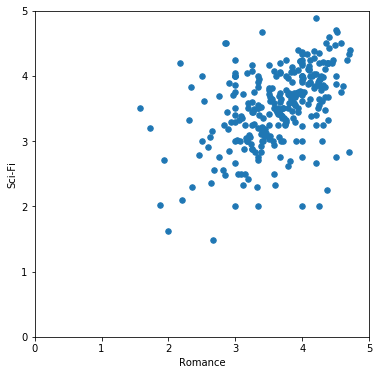

In [46]:
draw_scatterplot(biased_rating['Romance'],'Romance',biased_rating['Sci-Fi'],'Sci-Fi')

In [47]:
def draw_clusters(biased_dataset, predictions, cluster_center, cmap='viridis'):
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111)
    plt.xlim(0, 5)
    plt.ylim(0, 5)
    ax.set_xlabel('Romance')
    ax.set_ylabel('Sci-Fi')
    clustered = pd.concat([biased_dataset.reset_index(), pd.DataFrame({'group':predictions})], axis=1)
    plt.scatter(clustered['Romance'], clustered['Sci-Fi'], c=clustered['group'], s=20)
    plt.scatter(cluster_center[:,0], cluster_center[:,1], s=250, c='red', marker='*')

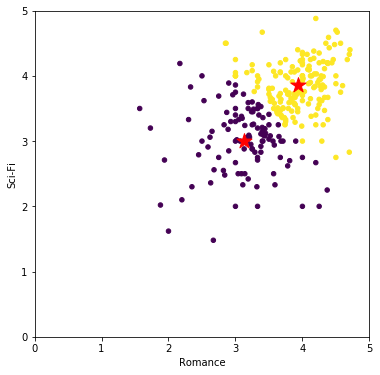

In [48]:
X = np.array(biased_rating[['Romance', 'Sci-Fi']].values)
from sklearn.cluster import KMeans
cluster = KMeans(n_clusters=2)
pred = cluster.fit_predict(X)
draw_clusters(biased_rating, pred, cluster.cluster_centers_)

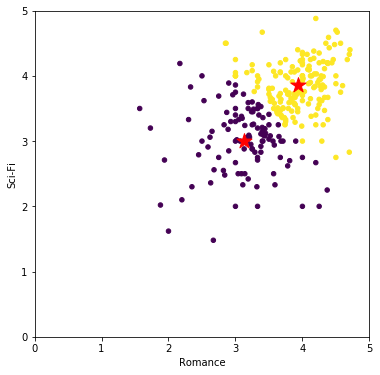

In [49]:
cluster = KMeans(n_clusters=2, init='k-means++')
pred = cluster.fit_predict(X)
draw_clusters(biased_rating, pred, cluster.cluster_centers_)

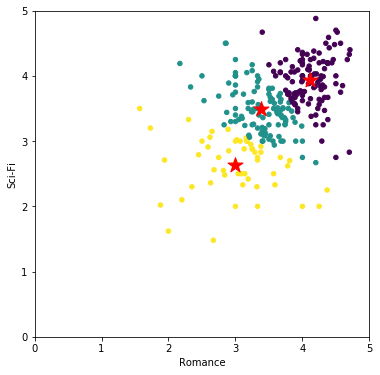

In [50]:
cluster = KMeans(n_clusters=3)
pred = cluster.fit_predict(X)
draw_clusters(biased_rating, pred, cluster.cluster_centers_)

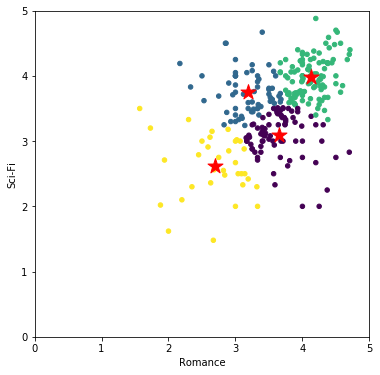

In [51]:
cluster = KMeans(n_clusters=4)
pred = cluster.fit_predict(X)
draw_clusters(biased_rating, pred, cluster.cluster_centers_)

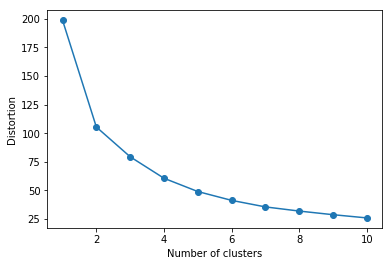

In [52]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')

plt.show()

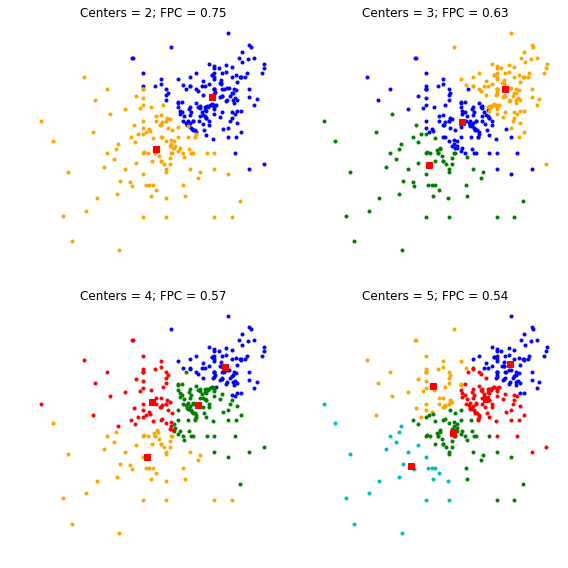

In [53]:
import skfuzzy as fuzz

X = np.array(biased_rating[['Romance', 'Sci-Fi']].values)
xpts = np.array([i[0] for i in X])
ypts = np.array([j[1] for j in X])
alldata = np.vstack((xpts, ypts))

colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']
fig1, axes1 = plt.subplots(2, 2, figsize=(8, 8))
fpcs = []

for ncenters, ax in enumerate(axes1.reshape(-1), 2):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(alldata, ncenters, 2, error=0.005, maxiter=1000, init=None)

    fpcs.append(fpc)

    cluster_membership = np.argmax(u, axis=0)
    for j in range(ncenters):
        ax.plot(xpts[cluster_membership == j],
                ypts[cluster_membership == j], '.', color=colors[j])
    for pt in cntr:
        ax.plot(pt[0], pt[1], 'rs')

    ax.set_title('Centers = {0}; FPC = {1:.2f}'.format(ncenters, fpc))
    ax.axis('off')

fig1.tight_layout()

Text(0,0.5,'Fuzzy partition coefficient')

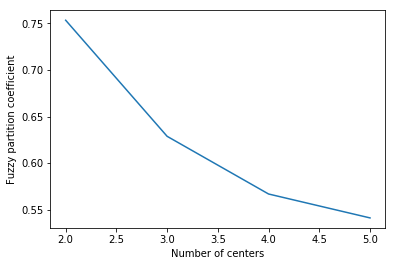

In [55]:
fig2, ax2 = plt.subplots()
ax2.plot(np.r_[2:6], fpcs)
ax2.set_xlabel("Number of centers")
ax2.set_ylabel("Fuzzy partition coefficient")
